In [2]:
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt

# Number of trading days in NYSE in a year

## 252

# load data frame
- build date range we are interested in
- next red the SPY file for reference and do joins
- load other files and joins 
- pluck interested columns as you do joins

In [4]:
start_date = '2010-01-01'
end_date = '2010-12-31'
dates = pd.date_range(start_date, end_date) # this is index objex


In [17]:
# build data frame with specified index; this is an empty data frame with index only
emptyDf = DataFrame(index=dates)

In [10]:
# load SPY file to use it as reference. For join to workout, use date
# as index; Select only the interested columns using use_cols
dfSPY = pd.read_csv("data/SPY.csv", index_col="Date", parse_dates=True, 
        usecols=['Date', 'Adj Close'], na_values=['nan'])\
        .rename(columns={'Adj Close': 'SPY'})

In [12]:
# df = df1.join(dfSPY)
# df = df.dropna()  # drop na so we drop non existing values

# do join and drop na all in one! like inner join in sql
# also note that the dates are now in increasing order as opposed to decreasing in the STOCKS file
df1 = emptyDf.join(dfSPY, how="inner")

In [13]:
df2 = df1.copy()
for ticker in ['GOOG', 'IBM', 'GLD']:
    df_temp = pd.read_csv(f"data/{ticker}.csv", index_col='Date', parse_dates=True,
    usecols=['Date', 'Adj Close'], na_values=['nan']).rename(columns={'Adj Close': ticker})
    df2 = df2.join(df_temp, how="inner")

In [18]:
df2.head(20)

,SPY,GOOG,IBM,GLD
2010-01-04,108.27,626.75,126.24,109.80
2010-01-05,108.56,623.99,124.71,109.70
2010-01-06,108.64,608.26,123.90,111.51
2010-01-07,109.10,594.10,123.47,110.82
2010-01-08,109.46,602.02,124.71,111.37
2010-01-11,109.61,601.11,123.41,112.85
2010-01-12,108.59,590.48,124.39,110.49
2010-01-13,109.51,587.09,124.12,111.54
2010-01-14,109.80,589.85,126.10,112.03
2010-01-15,108.57,580.00,125.60,110.86


# Slice the data to select specific rows and columns

In [43]:
df2.loc['2010-01-01':'2010-01-31',['SPY', 'IBM', 'GLD']]

,SPY,IBM,GLD
2010-01-04,108.27,126.24,109.80
2010-01-05,108.56,124.71,109.70
2010-01-06,108.64,123.90,111.51
2010-01-07,109.10,123.47,110.82
2010-01-08,109.46,124.71,111.37
2010-01-11,109.61,123.41,112.85
2010-01-12,108.59,124.39,110.49
2010-01-13,109.51,124.12,111.54
2010-01-14,109.80,126.10,112.03
2010-01-15,108.57,125.60,110.86


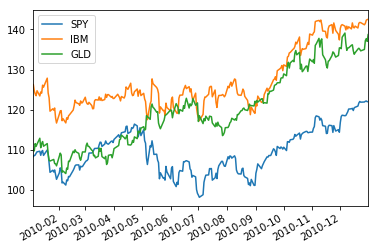

In [37]:
df2.loc['2010-01-01':'2012-01-31',['SPY', 'IBM', 'GLD']].plot()

In [47]:
def plot_data(df, title="Stock Prices"):
    ax = df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

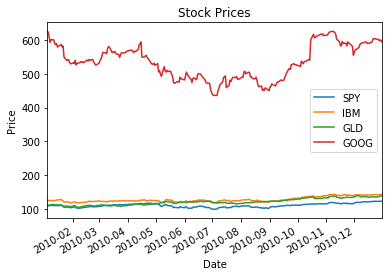

In [50]:
data = df2.loc['2010-01-01':'2010-12-31',['SPY', 'IBM', 'GLD', 'GOOG']]
plot_data(data)

In [63]:
def normalize_data(df):
    return df / df.iloc[0]

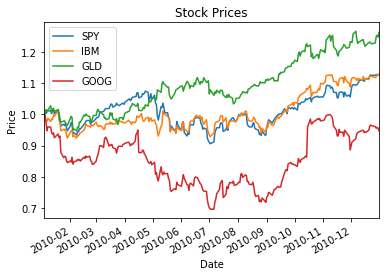

In [70]:
normalizedData = (df2.loc['2010-01-01':'2012-12-31',['SPY', 'IBM', 'GLD', 'GOOG']])
normalizedData = normalize_data(normalizedData)
plot_data(normalizedData)

In [52]:
df2.loc['2010-01-01':'2010-01-31',['SPY', 'IBM', 'GLD']]

,SPY,IBM,GLD
2010-01-04,108.27,126.24,109.80
2010-01-05,108.56,124.71,109.70
2010-01-06,108.64,123.90,111.51
2010-01-07,109.10,123.47,110.82
2010-01-08,109.46,124.71,111.37
2010-01-11,109.61,123.41,112.85
2010-01-12,108.59,124.39,110.49
2010-01-13,109.51,124.12,111.54
2010-01-14,109.80,126.10,112.03
2010-01-15,108.57,125.60,110.86
